In [1]:
import cv2
import torch.utils.data as data
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from os.path import join
from os import listdir
import matplotlib.pyplot as plt

e:\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### not important ###

def load_img(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def cvt_to_image(image):
    image = image.cpu().squeeze(0)
    image = ToPILImage()(image*0.5+0.5)
    return image

class CustomDatasetTest(data.Dataset):
    def __init__(self, noisy_image_paths, transform=None):
        self.noisy_image_paths = [join(noisy_image_paths, x) for x in listdir(noisy_image_paths)]
        self.transform = transform

    def __len__(self):
        return len(self.noisy_image_paths)

    def __getitem__(self, index):
        
        noisy_image_path = self.noisy_image_paths[index]
        noisy_image = load_img(self.noisy_image_paths[index])
        
        if self.transform:
            noisy_image = self.transform(noisy_image)

        return noisy_image, noisy_image_path

In [4]:
# Transform Definition
class BilateralBlur(object):
    def __init__(self, output_size):
        assert isinstance(output_size, int)
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self,sample):
        image = sample
        h, w = image.shape[:2]

        return cv2.bilateralFilter(image,-1,10,5)

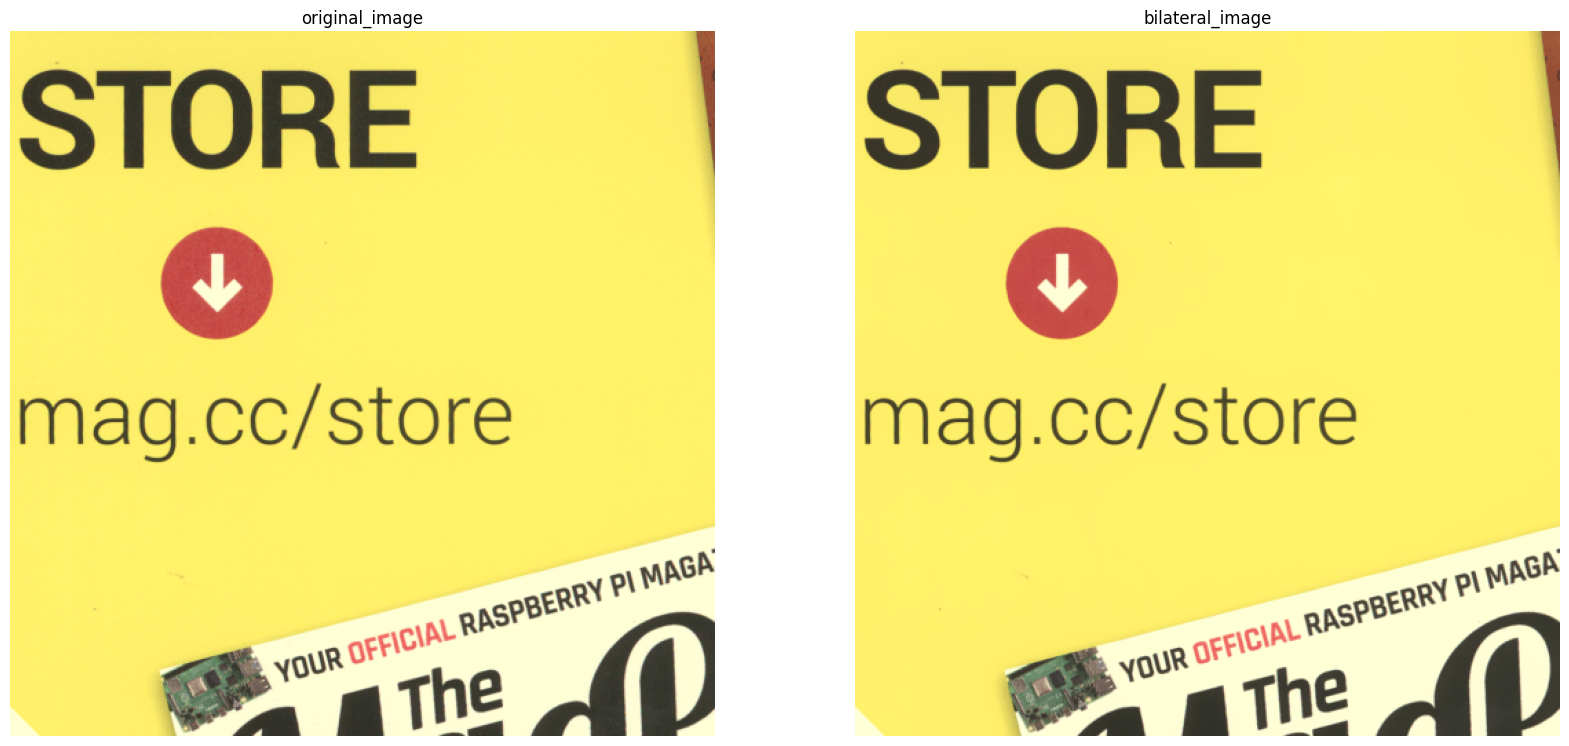

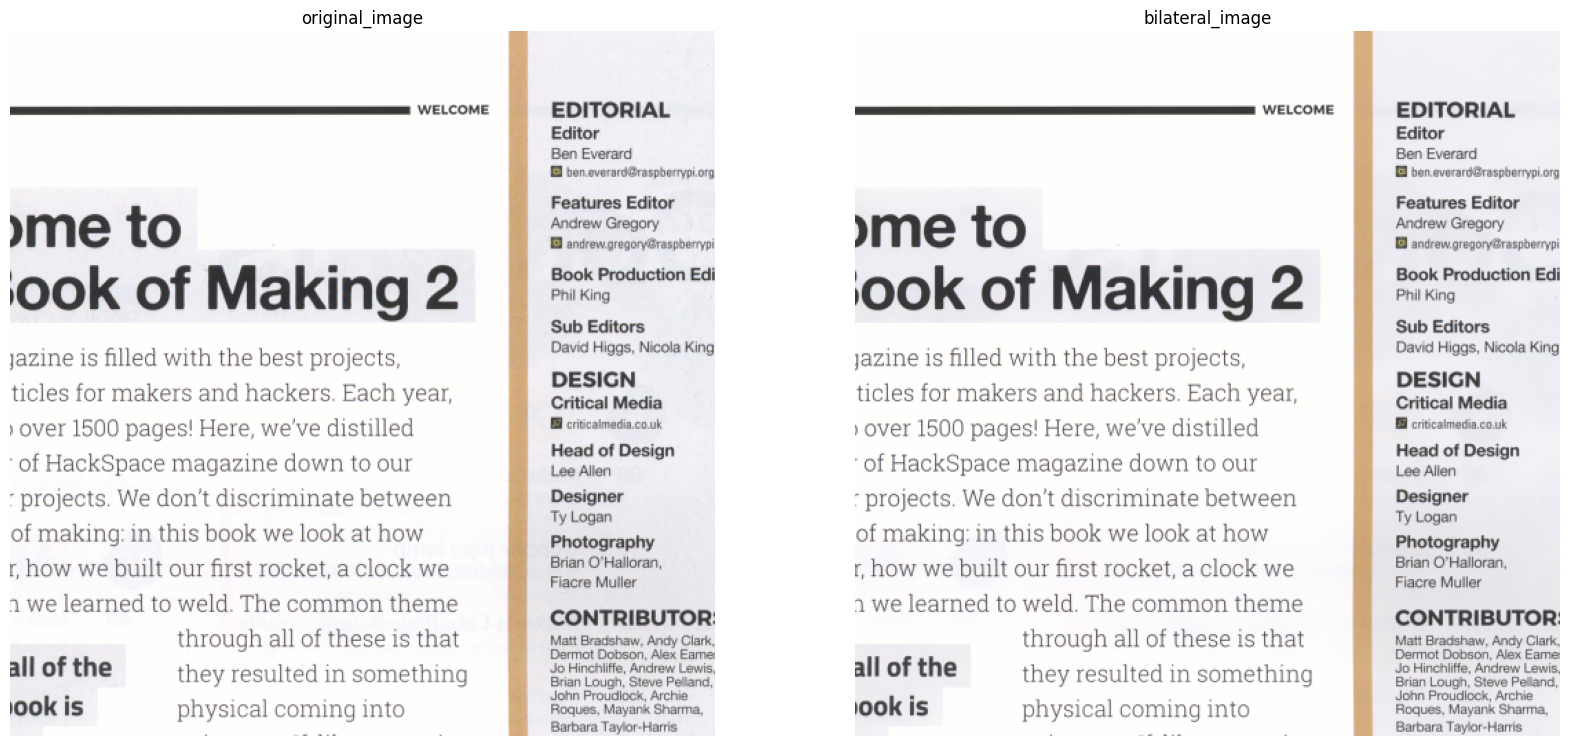

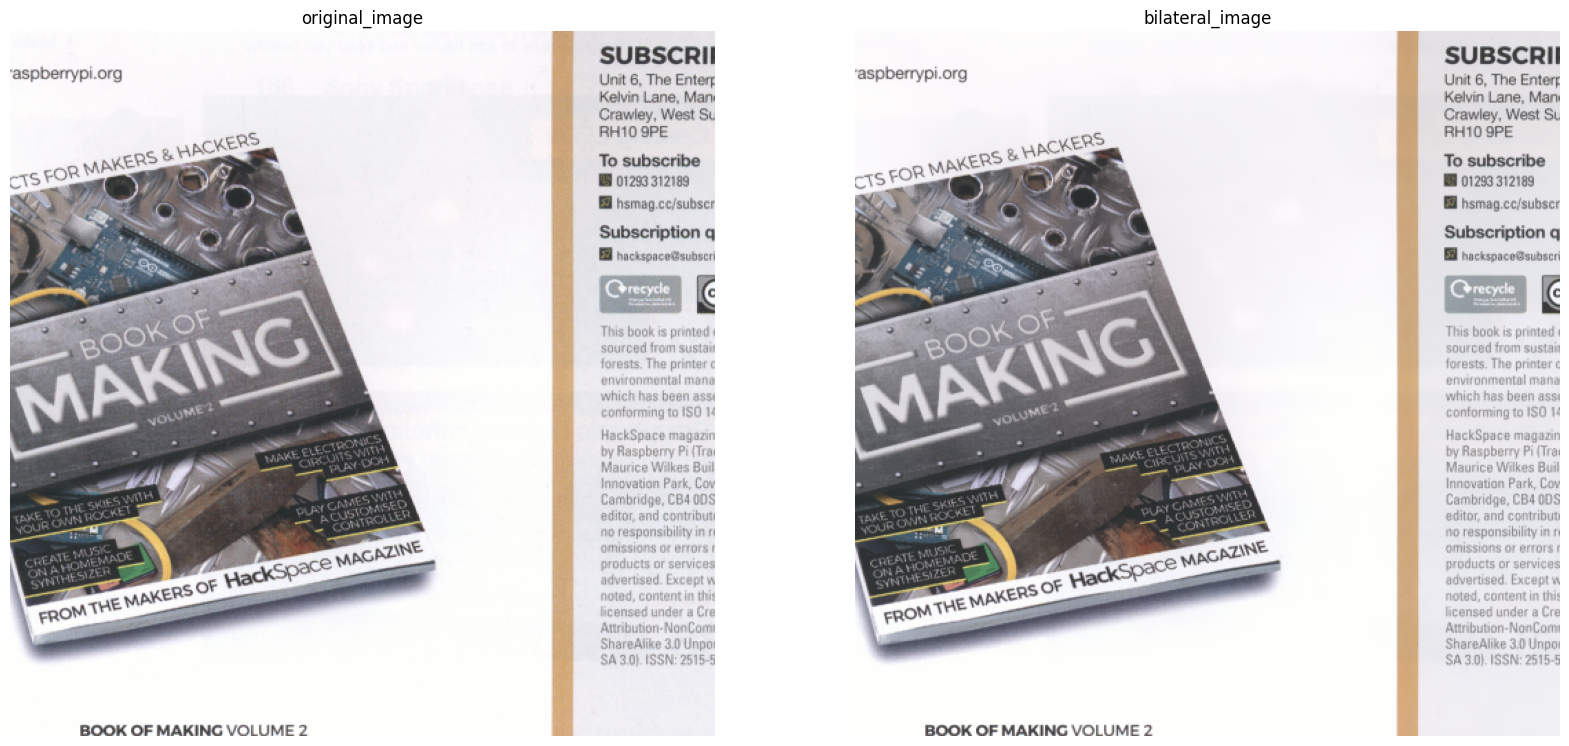

In [5]:
#### transfom display ####

transform_name = "BilateralBlur"
display_num = 2

original_transform = Compose([
    ToTensor(),
])

bilateral_transform = Compose([
    BilateralBlur(512),
    ToTensor(),
])


original_image_paths = '/local_datasets/MLinP/train/scan/'

original_dataset = CustomDatasetTest(original_image_paths, transform=original_transform)
bilateral_dataset = CustomDatasetTest(original_image_paths, transform=bilateral_transform)

original_loader = DataLoader(original_dataset, batch_size=1, shuffle=False)
bilateral_loader = DataLoader(bilateral_dataset, batch_size=1, shuffle=False)


for i, ((original_image, original_image_path), (bilateral_image, bilateral_image_path) ) in enumerate(zip(original_loader,bilateral_loader)):

    if i > display_num:
        break

    original_image = ToPILImage()(original_image.squeeze(0))
    bilateral_image = ToPILImage()(bilateral_image.squeeze(0))

    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.title("original_image")
    plt.axis("off")
    plt.imshow(original_image)
    plt.subplot(1,2,2)
    plt.title(transform_name)
    plt.axis("off")
    plt.imshow(bilateral_image)
    plt.show()